<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall_2025/blob/main/Module%202/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 3 for the Fall 2024 Course "Machine Learning for Materials Science", University of Tennessee Knoxville, Department of Materials Science and Engineering.

- Instructor Sergei V. Kalinin

- The atoms data set is gracefully provided by Prof. Rampi Ramprasad, Georgia Instutute of Technology

**Please add student name and date**

# Start with the basics!

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

import pandas as pd
import seaborn as sns

## Import Atom Dataset

In [2]:
!gdown https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1

Downloading...
From: https://drive.google.com/uc?id=1SygYRQ4Iom2ZP7dANIyay7NIoCra2bE1
To: /content/atoms.csv
100% 5.89k/5.89k [00:00<00:00, 16.5MB/s]


In [3]:
df = pd.read_csv('/content/atoms.csv')
df.head()

,Symbol,Atomic_radius,Covalent_radius,Density,Pauling_Electronegativity,Electron_affinity,First_Ionisation_Energy,Heat_Evaporation,Melting_Point,Boiling_Point,Specific_Heat,Specific_Volume,Thermal_Conductivity,Max_Oxidation_States
0,H,53,31,0.0708,2.20,72.769,1311.3,0.904,14.01,20.280,14.267,14.1,0.1815,1
1,He,31,28,0.1470,0.00,-50.000,2361.3,0.080,0.95,4.216,5.188,31.8,0.1520,2
2,Li,167,128,0.5340,0.98,59.632,519.9,148.000,553.69,1118.150,3.489,13.1,84.8000,1
3,Be,112,96,1.8480,1.57,-50.000,898.8,309.000,1551.00,3243.000,1.824,5.0,201.0000,2
4,B,87,84,2.3400,2.04,26.989,800.2,504.500,2573.00,3931.000,1.025,4.6,27.4000,3


## Simple statistical analysis

Below each markdown section, write a code that will perform the analysis and visualize the results. Feel free to use CodeAssistant in Colab or ChatGPT. If there are additional questions, please provide answers in the markdown fields below the code section/output. While many Python libraries can be used for this analysis, Seaborn can be the most convenient.

1. Create a histogram of the melting point distribution

2. Create the boxplot of the melting and boiling points

3. Use the Standard Scaler in the scikit-learn to normalize the values in the table and create the boxplot of all variables. Hint: drop the non-numeric column. In the markdown field, comment on what information does boxplot provide.

Answer 3:

4. Explore other ways to represent statistical distribution of a single parameter.

## Correlation analysis

5. Plot the correlation between the melting point and boiling point and between covalent radius and density. In the markdown section, rationalize the observations.

Answer 5:

6. Create a heatmap of correlation coefficients between the entries in the table. Find by direct examination the groups of parameters with strongest positive and strongest negative correlations. In the markdown section, rationalize the observations.

Answer 6:

7. Create a pair distribution plot of Atomic_radius, Covalent_radius,Pauling_Electronegativity and First_Ionisation_Energy

---



## Simple Regression

8. Perform a linear fit between the boiling temperature and melting temperature and between specific heat and melting point. Provide the values of fit coefficients and units.

# Explore the classification

Let's create a simple data set that will allow us to explore several simple classifiers


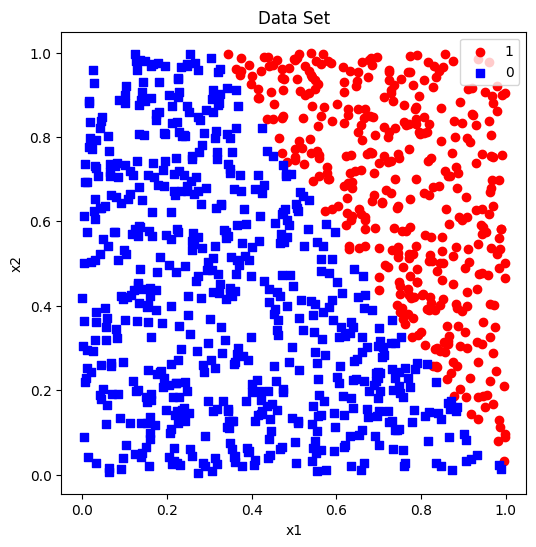

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate features
n = 1000
x1 = np.random.uniform(0, 1, n)
x2 = np.random.uniform(0, 1, n)

# Calculate targets
y = (x1 + 0.7*x2 >= 1).astype(int)

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(x1[y == 1], x2[y == 1], c='red', marker='o', label='1')
plt.scatter(x1[y == 0], x2[y == 0], c='blue', marker='s', label='0')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data Set')
plt.show()

X1 = np.column_stack((x1, x2))
y1 = y

9. Experiment with the different classifiers for this data set:
- Create train-test split (say 30-70)
- Build the decision tree classifier
- Explore the outputs if you vary the depth of the tree
- And see how the performance changes if you change the number of points in the data set (say compare 100 and 1000)
- Visualize the decision surface (use examples from class Colab)

10. Do the same for the perceptron classifier

11. Do the same for the logistics regression classifier
- Experiment with the regularization parameters
- Can you plot the data for small number of points but also add class probabilities?

# Bring in the LLM!

12. Here, we are going to use the ChatGPT to summarize the data about elements, and then use the information from our data set in the beginning of the notebook as features. This will be non-trivial process, because rather then working with the already provided data, we will have a chance to create our data set and discover that formats matter. Several steps:

- We want to get from ChatGPT table of the electronic properties of elements in the form where first column is element symbol, and the second column is metal/dielectric/semiconductor. It may take a few iterations - since ChatGPT will tend to introduce other forms of classification (e.g. metalloid). You can ask it early on to use Python form, that you can just cut and paste into Colab.

- The dataframe df in the beginning of the notebook that has feature vectors, and the dataframe you will get from ChatGPT will have different number of elements. You will have to pick the ones that are common to both. The easy way to do it is to convert corresponding columns to lists, and then do something like this: new_list = list(set(list1) & set(list2)). Then pick from both dataframes only rows that have elements present in the new_list

- One thing you will discover is that this operation will give you empty list the first time you do it. Try to identify the problem by examining the element symbols, and consider using operation like df['Symbol'] = df['Symbol'].str.strip()

- With these, build classifier with the allbproperties from df as features and metal/dielectric/semiconductor as target. What is the precision?

- Calculate confusion matrix

- Pick 2 random features that you think are most predictive and plot decision boundary in feature space.  